In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot

In [ ]:
df = pd.read_csv('/content/cleaned_banner_df.csv')
df = df.drop(columns='Unnamed: 0')
numeric_features = ['PRCP','SNWD','TAVG','TMAX','TMIN','TOBS','WESD','DAY_OF_YEAR','STREAMFLOW']
imputer = SimpleImputer()
df[numeric_features] = imputer.fit_transform(df[numeric_features])

In [ ]:
df

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR,STREAMFLOW
0,1987-01-01,0.9,25.225964,36.887152,52.136375,24.521684,16.0,6.8,1.0,272.0
1,1987-01-02,0.1,25.225964,36.887152,52.136375,24.521684,19.0,6.8,2.0,290.0
2,1987-01-03,0.4,25.225964,36.887152,52.136375,24.521684,19.0,7.4,3.0,296.0
3,1987-01-04,0.0,25.225964,36.887152,52.136375,24.521684,10.0,7.4,4.0,291.0
4,1987-01-05,0.0,25.225964,36.887152,52.136375,24.521684,6.0,7.4,5.0,282.0
...,...,...,...,...,...,...,...,...,...,...
12290,2020-08-26,0.2,0.000000,59.000000,77.000000,44.000000,49.0,0.0,239.0,413.0
12291,2020-08-27,0.0,0.000000,55.000000,72.000000,44.000000,44.0,0.0,240.0,417.0
12292,2020-08-28,0.0,0.000000,56.000000,75.000000,42.000000,44.0,0.0,241.0,408.0
12293,2020-08-29,0.0,0.000000,56.000000,76.000000,38.000000,41.0,0.0,242.0,398.0


In [ ]:

from google.colab import files
df.to_csv('cleaned_imputed_banner_df.csv')
files.download('cleaned_imputed_banner_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset = read_csv('cleaned_imputed_banner_df.csv',
                   index_col=0
                   )

In [ ]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [ ]:
type(dataset['DATE'])

pandas.core.series.Series

In [ ]:
dataset.set_index('DATE', inplace=True)

In [ ]:
cols = dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
dataset = dataset[cols] 

In [ ]:
dataset = dataset.drop(columns='TAVG')

In [ ]:
dataset

,STREAMFLOW,PRCP,SNWD,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR
DATE,,,,,,,,
1987-01-01,272.0,0.9,25.225964,52.136375,24.521684,16.0,6.8,1.0
1987-01-02,290.0,0.1,25.225964,52.136375,24.521684,19.0,6.8,2.0
1987-01-03,296.0,0.4,25.225964,52.136375,24.521684,19.0,7.4,3.0
1987-01-04,291.0,0.0,25.225964,52.136375,24.521684,10.0,7.4,4.0
1987-01-05,282.0,0.0,25.225964,52.136375,24.521684,6.0,7.4,5.0
...,...,...,...,...,...,...,...,...
2020-08-26,413.0,0.2,0.000000,77.000000,44.000000,49.0,0.0,239.0
2020-08-27,417.0,0.0,0.000000,72.000000,44.000000,44.0,0.0,240.0
2020-08-28,408.0,0.0,0.000000,75.000000,42.000000,44.0,0.0,241.0


In [ ]:
from google.colab import files
dataset.to_csv('date_index_cleaned_imputed_banner_df.csv')
files.download('date_index_cleaned_imputed_banner_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# from pandas import read_csv
# from matplotlib import pyplot
# # load dataset
# dataset = read_csv('/content/date_index_cleaned_imputed_banner_df.csv', header=0, index_col=0)
# values = dataset.values
# # specify columns to plot
# groups = [0, 1, 2, 3, 5, 6, 7]
# i = 1
# # plot each column
# pyplot.figure()
# for group in groups:
# 	pyplot.subplot(len(groups), 1, i)
# 	pyplot.plot(values[:, group])
# 	pyplot.title(dataset.columns[group], y=0.5, loc='right')
# 	i += 1
# pyplot.show()

Do I maybe need to convert the index to a datetime object?

In [ ]:
# # prepare data for lstm
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
 
# # convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = DataFrame(data)
# 	cols, names = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 		if i == 0:
# 			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
# 		else:
# 			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	agg.columns = names
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg
 
# # load dataset
# dataset = read_csv('date_index_cleaned_imputed_banner_df.csv', header=0, index_col=0)
# values = dataset.values


In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('date_index_cleaned_imputed_banner_df.csv', header=0, index_col=0)
values = dataset.values

In [ ]:
for i in range(1,0,-1):
  print(i)

1


In [ ]:
dataset

,STREAMFLOW,PRCP,SNWD,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR
DATE,,,,,,,,
1987-01-01,272.0,0.9,25.225964,52.136375,24.521684,16.0,6.8,1.0
1987-01-02,290.0,0.1,25.225964,52.136375,24.521684,19.0,6.8,2.0
1987-01-03,296.0,0.4,25.225964,52.136375,24.521684,19.0,7.4,3.0
1987-01-04,291.0,0.0,25.225964,52.136375,24.521684,10.0,7.4,4.0
1987-01-05,282.0,0.0,25.225964,52.136375,24.521684,6.0,7.4,5.0
...,...,...,...,...,...,...,...,...
2020-08-26,413.0,0.2,0.000000,77.000000,44.000000,49.0,0.0,239.0
2020-08-27,417.0,0.0,0.000000,72.000000,44.000000,44.0,0.0,240.0
2020-08-28,408.0,0.0,0.000000,75.000000,42.000000,44.0,0.0,241.0


In [ ]:
values

array([[2.72000000e+02, 9.00000000e-01, 2.52259642e+01, ...,
        1.60000000e+01, 6.80000000e+00, 1.00000000e+00],
       [2.90000000e+02, 1.00000000e-01, 2.52259642e+01, ...,
        1.90000000e+01, 6.80000000e+00, 2.00000000e+00],
       [2.96000000e+02, 4.00000000e-01, 2.52259642e+01, ...,
        1.90000000e+01, 7.40000000e+00, 3.00000000e+00],
       ...,
       [4.08000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        4.40000000e+01, 0.00000000e+00, 2.41000000e+02],
       [3.98000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        4.10000000e+01, 0.00000000e+00, 2.42000000e+02],
       [3.91000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        3.80000000e+01, 0.00000000e+00, 2.43000000e+02]])

In [ ]:
# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning


## Changing these inputs changes the time forecast, eg (scaled,  5, 1) will predict the current flow based on 5 day old data.
## This is really what I want to get at for a longer term forecast
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...   var6(t)   var7(t)   var8(t)
1   0.018959   0.290323   0.215607  ...  0.463636  0.165854  0.002740
2   0.021362   0.032258   0.215607  ...  0.463636  0.180488  0.005479
3   0.022163   0.129032   0.215607  ...  0.381818  0.180488  0.008219
4   0.021495   0.000000   0.215607  ...  0.345455  0.180488  0.010959
5   0.020294   0.000000   0.215607  ...  0.318182  0.180488  0.013699

[5 rows x 16 columns]


In [ ]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.018959,0.290323,0.215607,0.589035,0.646975,0.436364,0.165854,0.000000,0.021362,0.032258,0.215607,0.589035,0.646975,0.463636,0.165854,0.002740
2,0.021362,0.032258,0.215607,0.589035,0.646975,0.463636,0.165854,0.002740,0.022163,0.129032,0.215607,0.589035,0.646975,0.463636,0.180488,0.005479
3,0.022163,0.129032,0.215607,0.589035,0.646975,0.463636,0.180488,0.005479,0.021495,0.000000,0.215607,0.589035,0.646975,0.381818,0.180488,0.008219
4,0.021495,0.000000,0.215607,0.589035,0.646975,0.381818,0.180488,0.008219,0.020294,0.000000,0.215607,0.589035,0.646975,0.345455,0.180488,0.010959
5,0.020294,0.000000,0.215607,0.589035,0.646975,0.345455,0.180488,0.010959,0.019226,0.000000,0.215607,0.589035,0.646975,0.318182,0.180488,0.013699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,0.038451,0.000000,0.000000,0.835052,0.891304,0.736364,0.000000,0.649315,0.037784,0.064516,0.000000,0.845361,0.858696,0.736364,0.000000,0.652055
12291,0.037784,0.064516,0.000000,0.845361,0.858696,0.736364,0.000000,0.652055,0.038318,0.000000,0.000000,0.793814,0.858696,0.690909,0.000000,0.654795
12292,0.038318,0.000000,0.000000,0.793814,0.858696,0.690909,0.000000,0.654795,0.037116,0.000000,0.000000,0.824742,0.836957,0.690909,0.000000,0.657534
12293,0.037116,0.000000,0.000000,0.824742,0.836957,0.690909,0.000000,0.657534,0.035781,0.000000,0.000000,0.835052,0.793478,0.663636,0.000000,0.660274


In [ ]:
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [ ]:
reframed.shape

(12294, 16)

Now we are predicting the flow five days in advance. 

Should be quite a bit worse, but we'll see!

In [ ]:
# columns_to_keep = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t+4)']

In [ ]:
# reframed[columns_to_keep].head(20)

In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [ ]:
# reframed = reframed[columns_to_keep]

In [ ]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.018959,0.290323,0.215607,0.589035,0.646975,0.436364,0.165854,0.000000,0.021362
2,0.021362,0.032258,0.215607,0.589035,0.646975,0.463636,0.165854,0.002740,0.022163
3,0.022163,0.129032,0.215607,0.589035,0.646975,0.463636,0.180488,0.005479,0.021495
4,0.021495,0.000000,0.215607,0.589035,0.646975,0.381818,0.180488,0.008219,0.020294
5,0.020294,0.000000,0.215607,0.589035,0.646975,0.345455,0.180488,0.010959,0.019226


In [ ]:

# split into train and test sets
values = reframed.values
## 20 years
n_train_days = 365 * 20
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(7300, 1, 8) (7300,) (4994, 1, 8) (4994,)


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
20/20 - 0s - loss: 0.0688 - val_loss: 0.0701
Epoch 2/50
20/20 - 0s - loss: 0.0635 - val_loss: 0.0681
Epoch 3/50
20/20 - 0s - loss: 0.0601 - val_loss: 0.0625
Epoch 4/50
20/20 - 0s - loss: 0.0554 - val_loss: 0.0587
Epoch 5/50
20/20 - 0s - loss: 0.0524 - val_loss: 0.0550
Epoch 6/50
20/20 - 0s - loss: 0.0492 - val_loss: 0.0508
Epoch 7/50
20/20 - 0s - loss: 0.0456 - val_loss: 0.0461
Epoch 8/50
20/20 - 0s - loss: 0.0413 - val_loss: 0.0407
Epoch 9/50
20/20 - 0s - loss: 0.0371 - val_loss: 0.0348
Epoch 10/50
20/20 - 0s - loss: 0.0320 - val_loss: 0.0286
Epoch 11/50
20/20 - 0s - loss: 0.0257 - val_loss: 0.0269
Epoch 12/50
20/20 - 0s - loss: 0.0173 - val_loss: 0.0150
Epoch 13/50
20/20 - 0s - loss: 0.0126 - val_loss: 0.0095
Epoch 14/50
20/20 - 0s - loss: 0.0089 - val_loss: 0.0095
Epoch 15/50
20/20 - 0s - loss: 0.0077 - val_loss: 0.0089
Epoch 16/50
20/20 - 0s - loss: 0.0069 - val_loss: 0.0083
Epoch 17/50
20/20 - 0s - loss: 0.0066 - val_loss: 0.0080
Epoch 18/50
20/20 - 0s - loss: 0.0065 - 

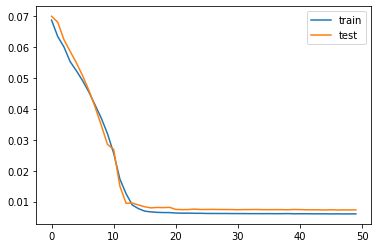

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=365, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [ ]:
test_X[0]

array([0.03591456, 0.22580646, 0.49572653, 0.40206185, 0.6086956 ,
       0.48181817, 0.30731708, 0.9863014 ], dtype=float32)

In [ ]:

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

In [ ]:
inv_yhat.shape

(4994, 8)

In [ ]:
yhat[0]

array([0.03654969], dtype=float32)

In [ ]:
inv_yhat[0]

array([0.03654969, 0.22580646, 0.49572653, 0.40206185, 0.6086956 ,
       0.48181817, 0.30731708, 0.9863014 ], dtype=float32)

In [ ]:
inv_yhat = scaler.inverse_transform(inv_yhat)

In [ ]:
inv_yhat = inv_yhat[:,0]

In [ ]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.674


In [ ]:
inv_y

array([368.     , 310.     , 300.     , ..., 408.00003, 398.     ,
       391.00003], dtype=float32)

In [ ]:
inv_yhat

array([403.75717, 346.1518 , 295.68652, ..., 417.93814, 410.3835 ,
       401.29413], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score
r2_LSTM = r2_score(inv_y, inv_yhat)
print(r2_LSTM)

0.9799824061925376


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_LSTM = mean_absolute_error(inv_y, inv_yhat)
print(f'MEAN ABSOLUTE ERROR: {mae_LSTM:,.0f} CFS')

MEAN ABSOLUTE ERROR: 55 CFS


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
dataset[:-len(inv_y)]

,STREAMFLOW,PRCP,SNWD,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR
DATE,,,,,,,,
1987-01-01,272.0,0.9,25.225964,52.136375,24.521684,16.0,6.8,1.0
1987-01-02,290.0,0.1,25.225964,52.136375,24.521684,19.0,6.8,2.0
1987-01-03,296.0,0.4,25.225964,52.136375,24.521684,19.0,7.4,3.0
1987-01-04,291.0,0.0,25.225964,52.136375,24.521684,10.0,7.4,4.0
1987-01-05,282.0,0.0,25.225964,52.136375,24.521684,6.0,7.4,5.0
...,...,...,...,...,...,...,...,...
2006-12-23,330.0,0.3,40.000000,28.000000,2.000000,18.0,10.1,357.0
2006-12-24,340.0,0.0,43.000000,31.000000,3.000000,21.0,10.1,358.0
2006-12-25,340.0,0.7,46.000000,34.000000,21.000000,31.0,10.8,359.0


In [ ]:
dataset[-3534:]

,STREAMFLOW,PRCP,SNWD,TMAX,TMIN,TOBS,WESD,DAY_OF_YEAR
DATE,,,,,,,,
2010-12-27,319.0,0.2,49.0,27.0,21.0,22.0,11.9,361.0
2010-12-28,321.0,0.7,53.0,30.0,22.0,27.0,12.6,362.0
2010-12-29,328.0,0.7,58.0,28.0,9.0,9.0,13.2,363.0
2010-12-30,290.0,0.0,56.0,20.0,-7.0,-5.0,13.2,364.0
2010-12-31,240.0,0.0,55.0,18.0,-15.0,-9.0,13.2,365.0
...,...,...,...,...,...,...,...,...
2020-08-26,413.0,0.2,0.0,77.0,44.0,49.0,0.0,239.0
2020-08-27,417.0,0.0,0.0,72.0,44.0,44.0,0.0,240.0
2020-08-28,408.0,0.0,0.0,75.0,42.0,44.0,0.0,241.0


In [ ]:
inv_y

array([368.     , 310.     , 300.     , ..., 408.00003, 398.     ,
       391.00003], dtype=float32)

In [ ]:
inv_yhat

array([403.75717, 346.1518 , 295.68652, ..., 417.93814, 410.3835 ,
       401.29413], dtype=float32)

In [ ]:
len(inv_y)

4994

In [ ]:
# dataset.index[-3534:]

In [ ]:
# [int(numeric_string) for numeric_string in dataset.index[-3534:]]

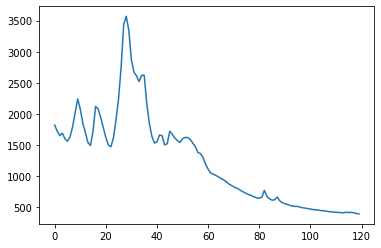

In [ ]:

plt.plot(inv_y[-120:], label = "Actual CFS");

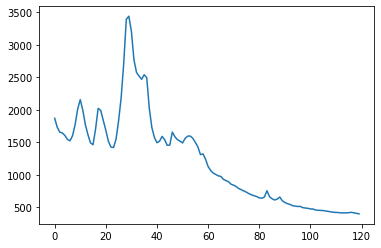

In [ ]:
plt.plot(inv_yhat[-120:], label = "predicted CFS");

In [ ]:

plt.show()


In [ ]:
inv_y

array([368.     , 310.     , 300.     , ..., 408.00003, 398.     ,
       391.00003], dtype=float32)

In [ ]:
df = pd.DataFrame({'Actual CFS':inv_y, 'Predicted CFS':inv_yhat})

In [ ]:
import plotly.graph_objects as go

# # Create random data with numpy
# import numpy as np
# np.random.seed(1)

# N = 100
# random_x = np.linspace(0, 1, N)
# random_y0 = np.random.randn(N) + 5
# random_y1 = np.random.randn(N)
# random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=df['Actual CFS'],
                    mode='lines',
                    name='Actual CFS'))
fig.add_trace(go.Scatter(y=df['Predicted CFS'],
                    mode='lines',
                    name='Predicted CFS'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='markers', name='markers'))

fig.show()